## EDA 


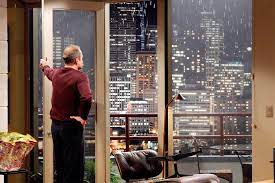

First of all we should import the necessary libraries and set some options.

In [77]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm



from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

We read the csv file fetched before.

In [3]:
df_houses = pd.read_csv('data/eda_selchuk.csv')

Firstly, we get general information about our dataset. For this, we use the `.head(), .info() and .describe()` methods.

In [4]:
# Display the first 5 rows in dataframe
pd.set_option('display.max_columns', 25) # Show the all columns in display
df_houses.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [75]:
# To check the datatypes and non-values in our data frame
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [76]:
df_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


When we examine the columns, we see that the `waterfront`, `grade` and `condition` columns are categorical ordinal data. Because `condition` and `grade` values are used like a rating number. In the `Waterfront` column, a value of 0 represents that the house is not on the beach, and 1 represents that the house is on the beach.

Values in all other columns are numerical data. (Except `lat`, `long` and `zipcode` because these values are used to tell us the location.) We can analyze descriptive statistics over numerical data.

We can easily see the Central Tendency (mean, median, mode and quartiles) values on the `describe` table.

To summarize, here we can see the values of all numeric columns. For example, we can see the mean of the number of `bedrooms` as 3.3, the median and mode as 3, and the quartiles as the first quartile 3, the second quartile 3, and the last quartile 4.

We can see the shape (range, interquartile range, standard deviation) values in the same way in the `describe` table. If we give an example from the `bedrooms` column, we can say that the range is between 1 and 33, the interquartile range is between 3 and 4, and the standard deviation is 0.92.

To give an example from the `bedrooms` column for modality, let's show it on a histogram plot.

Text(0.5, 0, 'Number of Bedrooms')

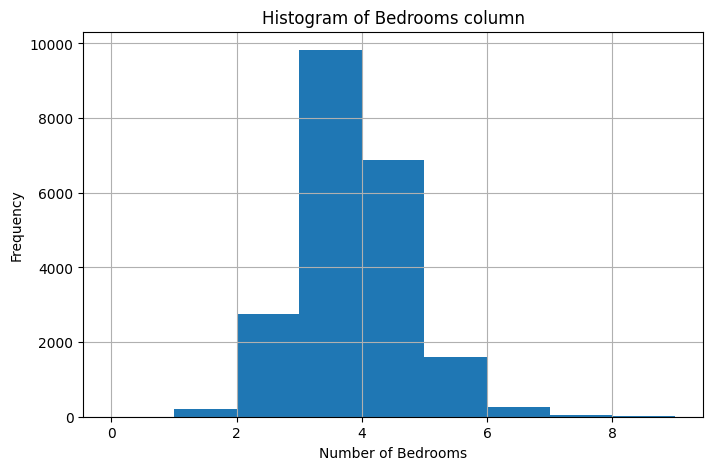

In [7]:
df_houses['bedrooms'].plot(kind='hist',
                           bins = [0,1,2,3,4,5,6,7,8,9],
                           title= 'Histogram of Bedrooms column',
                           grid = True,)
plt.xlabel('Number of Bedrooms')

Text(0.5, 1.0, 'Q-Q Plot of Bedrooms Column')

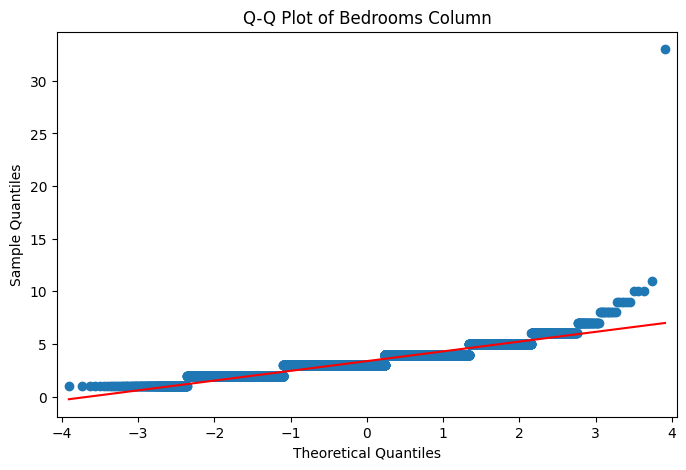

In [81]:
sm.qqplot(df_houses['bedrooms'], line='s')
plt.title('Q-Q Plot of Bedrooms Column')

As seen in the histogram chart above, we can say that `bedrooms` values have a `unimodal` model.

We can use the same histogram plot to see the modality in the other columns.

Text(0.5, 0, 'Number of Bathrooms')

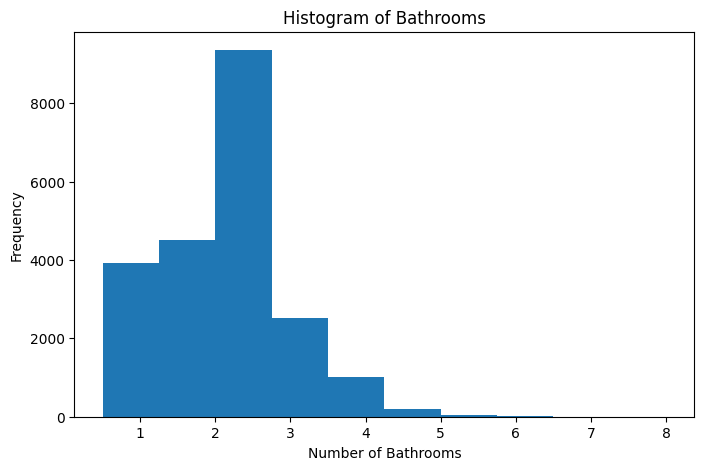

In [82]:
# Plot the histogram of Bathrooms
df_houses['bathrooms'].plot(kind='hist',
                            title = 'Histogram of Bathrooms')
plt.xlabel('Number of Bathrooms')

Text(0.5, 1.0, 'Q-Q Plot of Bathrooms Column')

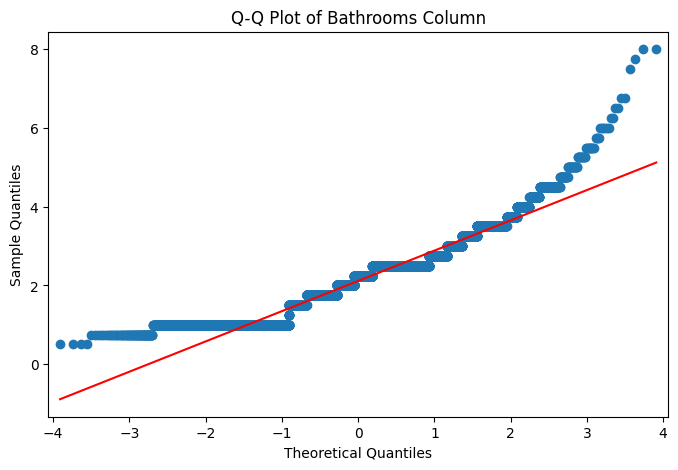

In [83]:
# Creating the Q-Q Plot of Bathrooms
sm.qqplot(df_houses['bathrooms'], line='s')
plt.title('Q-Q Plot of Bathrooms Column')

Text(0.5, 0, 'Square Footage of Living Area')

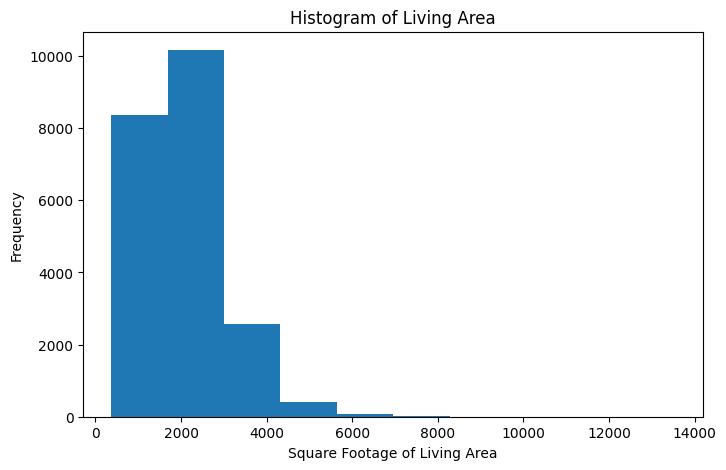

In [84]:
# Plot the histogram of Living Area
df_houses['sqft_living'].plot(kind='hist',
                            title = 'Histogram of Living Area')
plt.xlabel('Square Footage of Living Area')

Text(0.5, 1.0, 'Q-Q Plot of Sqft_Living Column (Living Area)')

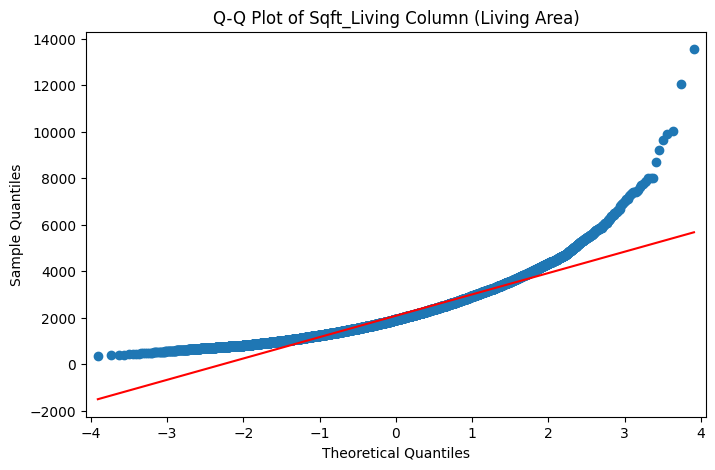

In [85]:
# Creating the Q-Q Plot of Living Area
sm.qqplot(df_houses['sqft_living'], line='s')
plt.title('Q-Q Plot of Sqft_Living Column (Living Area)')

Text(0.5, 0, 'Square Footage of Lot Area')

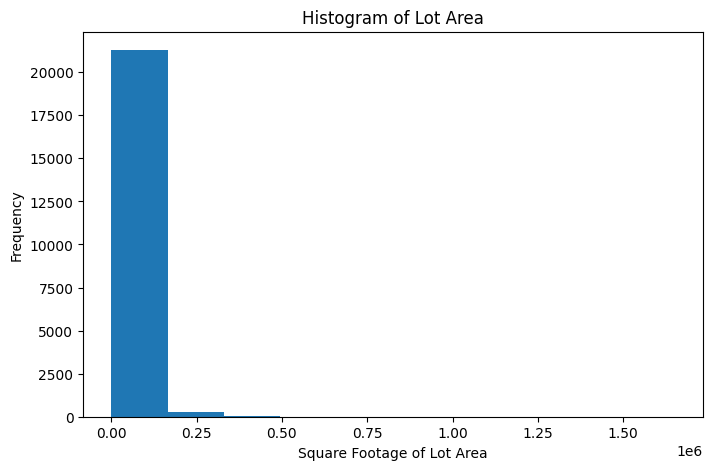

In [86]:
# Plot the histogram of Lot Area
df_houses['sqft_lot'].plot(kind='hist',
                            title = 'Histogram of Lot Area')
plt.xlabel('Square Footage of Lot Area')

Text(0.5, 1.0, 'Q-Q Plot of Sqft_Lot Column (Lot Area)')

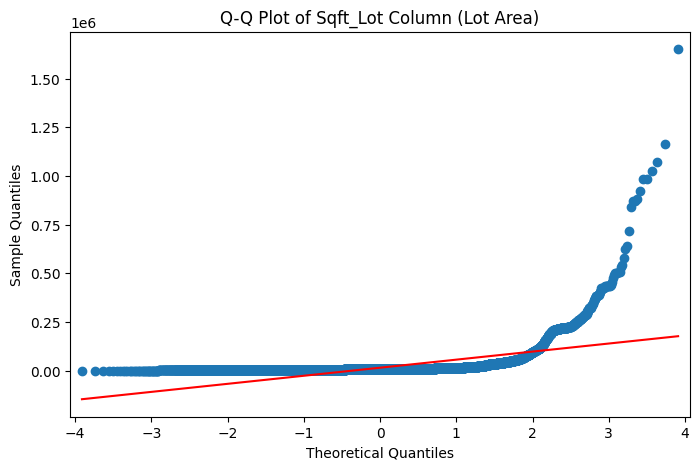

In [87]:
# Creating the Q-Q Plot of Lot Area
sm.qqplot(df_houses['sqft_lot'], line='s')
plt.title('Q-Q Plot of Sqft_Lot Column (Lot Area)')

* As an example of categorical data, we can give `waterfront`, `grade` and `condition` columns. We can create a bar plot to see their frequencies.

Text(0, 0.5, 'Number of Houses')

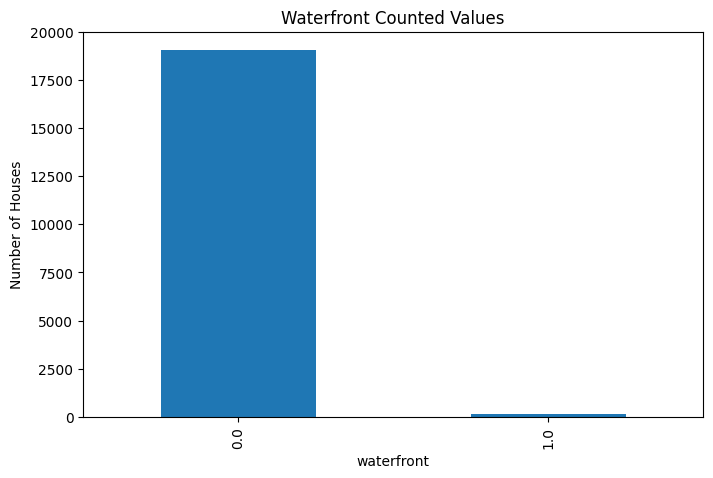

In [8]:
# df_houses.plot.bar(x = df_houses['waterfront'], y = df_houses['waterfront'].value_counts())

df_houses['waterfront'].value_counts().plot.bar(x=df_houses['waterfront'].value_counts()[0], y= df_houses['waterfront'].value_counts()[1])
plt.title('Waterfront Counted Values')
plt.ylabel('Number of Houses')

Text(0, 0.5, 'Number of Houses')

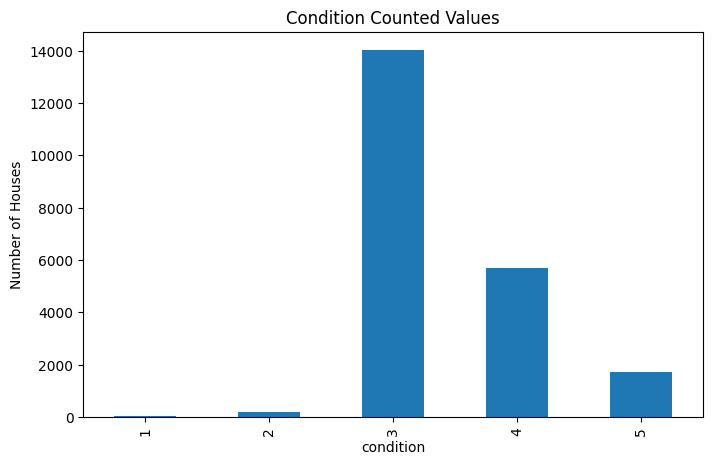

In [17]:
df_houses.groupby('condition')['condition'].count().plot.bar()
plt.title('Condition Counted Values')
plt.ylabel('Number of Houses')


Text(0, 0.5, 'Number of Houses')

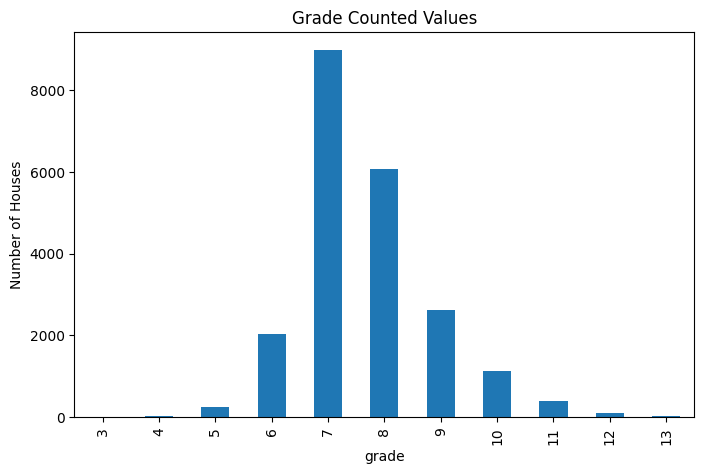

In [15]:
df_houses.groupby('grade')['grade'].count().plot.bar()
plt.title('Grade Counted Values')
plt.ylabel('Number of Houses')

Now that we have defined our data statistically, we can now examine the missing values.

In [18]:
# display number of missing values per column
df_houses.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

When we look at the output, we see that there are missing data in 4 columns. I want to compare these missing values to all data and see what percentage of missing data we have.

In [19]:
print(f"numbers of rows : {df_houses.shape[0]}")
print(f"missing values in waterfront : {round(df_houses.waterfront.isna().sum()/df_houses.shape[0]*100,2)} %")
print(f"missing values in yr_renovated : {round(df_houses.yr_renovated.isna().sum()/df_houses.shape[0]*100,2)} %")
print(f"missing values in view : {round(df_houses.view.isna().sum()/df_houses.shape[0]*100,2)} %")
print(f"missing values in sqft_basement : {round(df_houses.sqft_basement.isna().sum()/df_houses.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df_houses.isna().sum().sum()/(df_houses.shape[0]*df_houses.shape[1])*100,2)} %")


numbers of rows : 21597
missing values in waterfront : 11.07 %
missing values in yr_renovated : 17.82 %
missing values in view : 0.29 %
missing values in sqft_basement : 2.09 %
missing values in data frame : 1.36 %


I want to see the data we have obtained in the graph. So I will use the missingno library. This missingno library is used to show the lost data as a percentage in the bar chart. Each bar represents a column.

<Axes: >

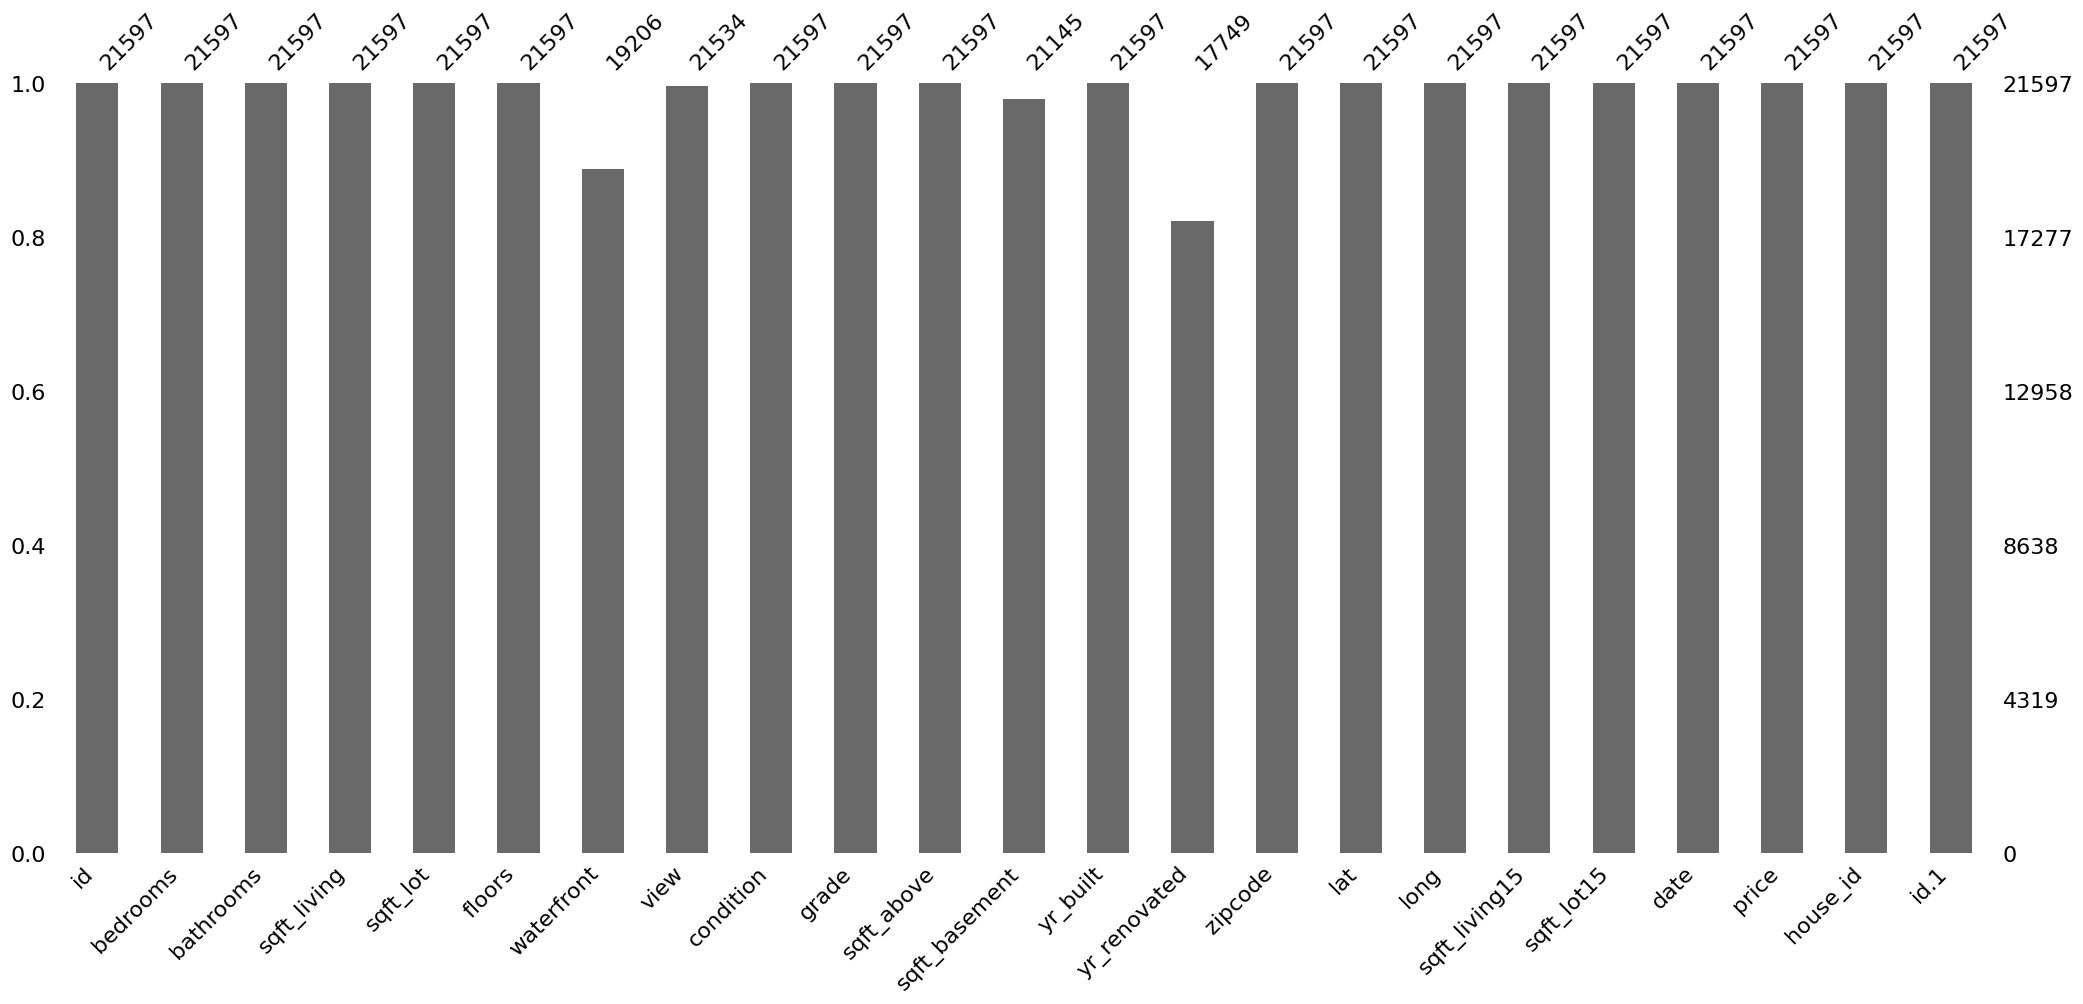

In [20]:
# import missingno
import missingno as msno
msno.bar(df_houses)

The missing value of 1.42% in the data frame is acceptable. However, when we look at the missing values in the columns, there is a huge loss of 11.07% in 'waterfront' and 17.82% in 'yr_renovated'. Therefore, we can try to fill the missing values here instead of throwing them away.

We can remove missing values in the `view` and `sqft_basement`. Because there are not enough values to affect our analysis.

However, for this, we need to think about the reasons for not entering these data. While examining these missing values, it may be necessary to look at other properties related to this column and meaningful inferences can be made.

We cannot use interpolation while filling the missing values. Because the `waterfront` column is of categorical data type. Giving 0 or 1 here may cause significant changes for the target column. Because when determining the price of the house, whether it is on the beach and whether the renovation year is early or late can be an important factor.

However, in order not to spoil the model too much, we can fill in the missing values with the median values of the `waterfront` and `yr_renovated` columns.

In [27]:
# First, copy the actual data frame for filling missing values
df_houses_copy = df_houses.copy()

In [28]:
df_houses_copy.fillna({
    "waterfront" : df_houses_copy['waterfront'].median(),
    "yr_renovated" : df_houses_copy['yr_renovated'].median()
}, inplace = True)

df_houses_copy.dropna(inplace=True, ignore_index=True)


In [29]:
df_houses_copy.count()

id               21084
bedrooms         21084
bathrooms        21084
sqft_living      21084
sqft_lot         21084
floors           21084
waterfront       21084
view             21084
condition        21084
grade            21084
sqft_above       21084
sqft_basement    21084
yr_built         21084
yr_renovated     21084
zipcode          21084
lat              21084
long             21084
sqft_living15    21084
sqft_lot15       21084
date             21084
price            21084
house_id         21084
id.1             21084
dtype: int64

After the missing value processing stage, we have the same number of data in all our columns and we do not have any missing values.

## Research Questions and Hypothesis Generation

# Research Question
* Does the location of the house affect the price of the house?

# Hypothesis
* The price of the house with a waterfront is higher than the other.
* When the number of bedrooms increases,then the price of the house increases.
* When the grade points increase,then the price of the house increases.
* When condition points increase,then the price of the house increases.

## Questions based on hypotheses
1. Do houses with a waterfront cost more than those without?
2. Does the price of the house increase as the living area increases?
3. Does the price of the house increase as the lot area increases?
4. Does the price of the houses change as the area of Living15 increases?
5. Does the price of the houses increase as the Lot15 area increases?

Now we can delete the columns that our client is not interested in from our data frame.
These are respectively;
- 'id'
- 'id.1'
- 'house_id'
- 'bathrooms'
- 'floors'
- 'view'
- 'sqft_basement'
- 'yr_built'
- 'yr_renovated'
- 'date'

In [30]:
df_houses_copy.drop(['bathrooms', 'floors', 'view', 'sqft_basement', 'yr_built', 'yr_renovated', 'id', 'id.1', 'house_id', 'date'], axis = 1, inplace=True)

Now we can see our current information.

In [31]:
df_houses_copy.head()

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3.000,1180.000,5650.000,0.000,3,7,1180.000,98178,47.511,-122.257,1340.000,5650.000,221900.000
1,3.000,2570.000,7242.000,0.000,3,7,2170.000,98125,47.721,-122.319,1690.000,7639.000,538000.000
2,2.000,770.000,10000.000,0.000,3,6,770.000,98028,47.738,-122.233,2720.000,8062.000,180000.000
3,4.000,1960.000,5000.000,0.000,5,7,1050.000,98136,47.521,-122.393,1360.000,5000.000,604000.000
4,3.000,1680.000,8080.000,0.000,3,8,1680.000,98074,47.617,-122.045,1800.000,7503.000,510000.000


## Exploring Data

First of all, we can change the types of our data because some columns have float values. If we convert this data to int, the data will be easier to process and they will look easier to understand on the graph.

In [34]:
df_houses_copy[['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']] = df_houses_copy[['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']].astype('int64')
df_houses_copy.head()

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3.000,1180,5650,0,3,7,1180,98178,47.511,-122.257,1340,5650,221900
1,3.000,2570,7242,0,3,7,2170,98125,47.721,-122.319,1690,7639,538000
2,2.000,770,10000,0,3,6,770,98028,47.738,-122.233,2720,8062,180000
3,4.000,1960,5000,0,5,7,1050,98136,47.521,-122.393,1360,5000,604000
4,3.000,1680,8080,0,3,8,1680,98074,47.617,-122.045,1800,7503,510000


Let's generate histogram plots with continuous columns and try to catch a pattern.

First, let's create the graph of the bedroom values.

Text(0.5, 0, 'Number of Bedrooms')

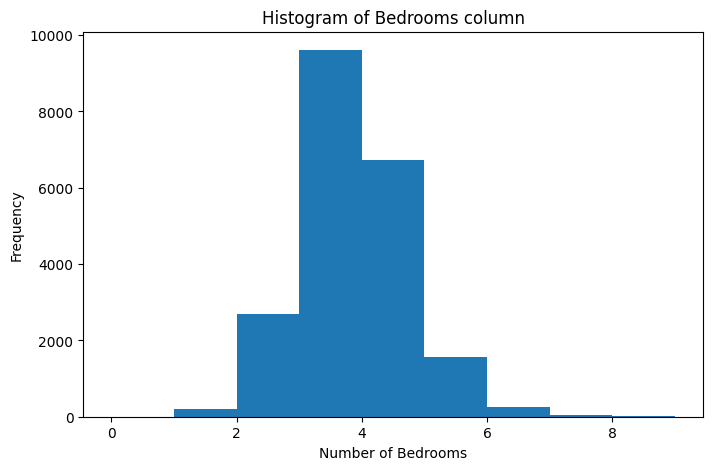

In [36]:
df_houses_copy['bedrooms'].plot(kind='hist',
                           bins = [0,1,2,3,4,5,6,7,8,9],
                           title= 'Histogram of Bedrooms column')
plt.xlabel('Number of Bedrooms')

Text(0.5, 0, 'Features')

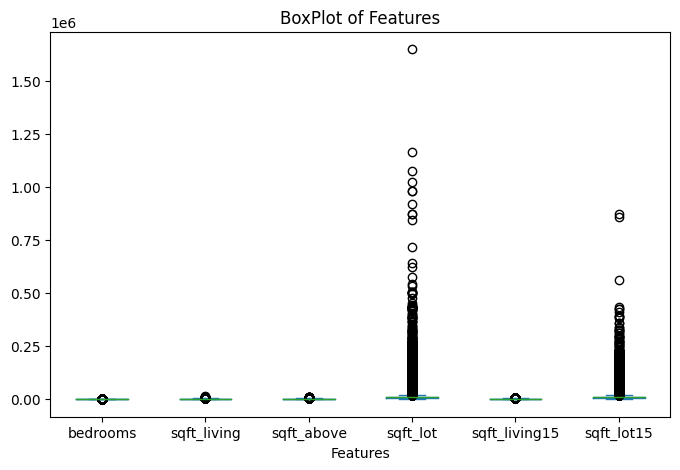

In [92]:
df_houses_copy[['bedrooms', 'sqft_living', 'sqft_above', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].plot(kind='box',
                           title= 'BoxPlot of Features')
plt.xlabel('Features')

Now let's graph the `sqft_living` values.

Text(0.5, 0, 'Living Area (Square Feet)')

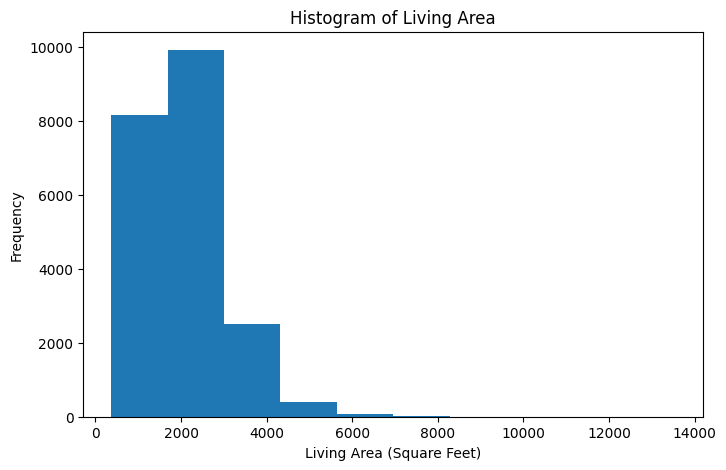

In [37]:
df_houses_copy['sqft_living'].plot(kind='hist', 
                                   title = 'Histogram of Living Area')
plt.xlabel('Living Area (Square Feet)')

Let's graph for the `sqft_lot` column.

Text(0.5, 0, 'Lot Area (Square Feet)')

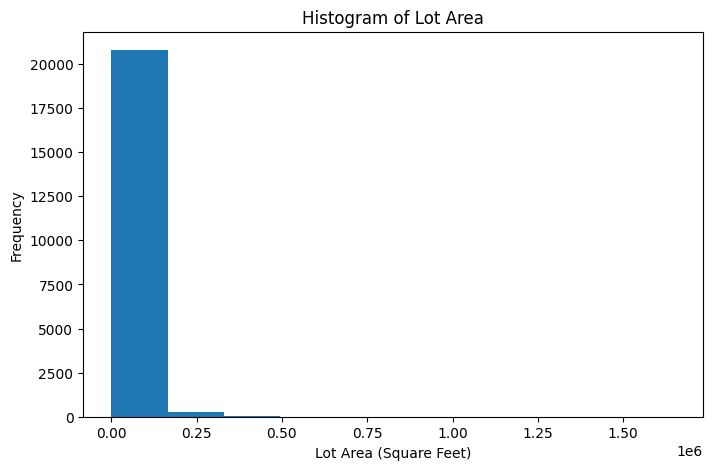

In [38]:
df_houses_copy['sqft_lot'].plot(kind='hist', 
                                   title = 'Histogram of Lot Area')
plt.xlabel('Lot Area (Square Feet)')

Let's show the graph of the `sqft_above` column.

Text(0.5, 0, 'Above Area (Square Feet)')

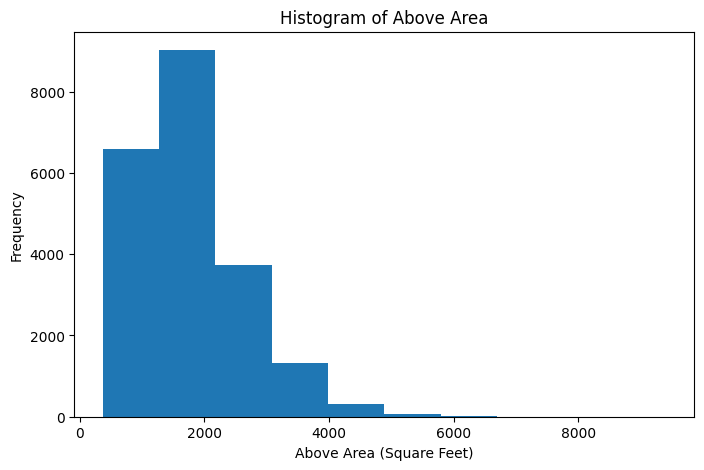

In [39]:
df_houses_copy['sqft_above'].plot(kind='hist', 
                                   title = 'Histogram of Above Area')
plt.xlabel('Above Area (Square Feet)')

Let's plot the `sqft_living15` column.

Text(0.5, 0, 'Nearest 15 Neighbor Living Area (Square Feet)')

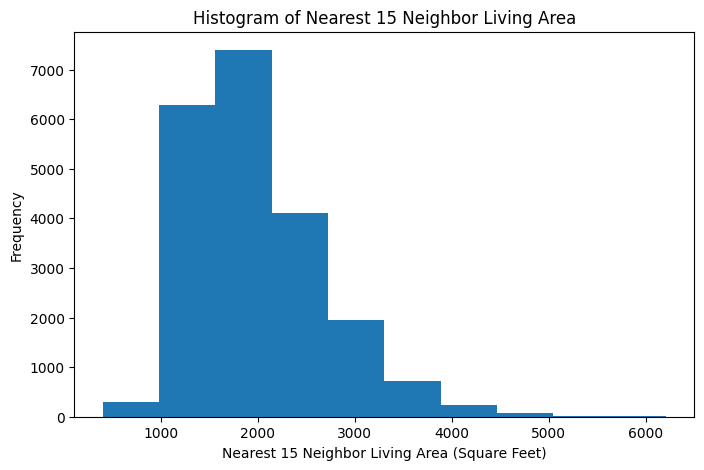

In [40]:
df_houses_copy['sqft_living15'].plot(kind='hist', 
                                   title = 'Histogram of Nearest 15 Neighbor Living Area')
plt.xlabel('Nearest 15 Neighbor Living Area (Square Feet)')

Let's plot `sqft_lot15`

Text(0.5, 0, 'Nearest 15 Neighbor Lot Area (Square Feet)')

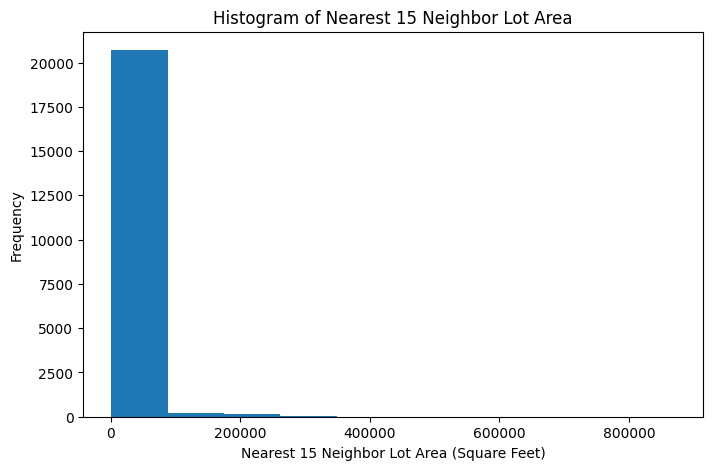

In [41]:
df_houses_copy['sqft_lot15'].plot(kind='hist', 
                                   title = 'Histogram of Nearest 15 Neighbor Lot Area')
plt.xlabel('Nearest 15 Neighbor Lot Area (Square Feet)')

We have plotted the graph of categorical columns above.

All of the above continuous columns have positive skewed. And each of them has extreme values that will affect the graph. In order to remove this data, we can remove more than 3 standard deviation values from our data frame as follows.

Another way to clear outlier data is to calculate over the z-score. However, I preferred to operate over std here.

In [47]:
# Try to remove all outliers from all columns

df_houses_copy1 = df_houses_copy.copy()
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

df_houses_copy1 = remove_outliers(df_houses_copy1, df_houses_copy1[['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_living15', 'sqft_lot15']], 4)
df_houses_copy1.describe()

Working on column: bedrooms
Working on column: sqft_living
Working on column: sqft_lot
Working on column: sqft_above
Working on column: sqft_living15
Working on column: sqft_lot15


,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000,20419.000
mean,3.357,2034.769,10373.854,0.006,3.413,7.620,1748.530,98078.845,47.562,-122.219,1961.319,9318.349,526332.030
std,0.880,833.505,12720.052,0.078,0.652,1.123,760.502,53.772,0.138,0.137,653.644,8633.838,326164.125
min,1.000,370.000,520.000,0.000,1.000,3.000,370.000,98001.000,47.156,-122.512,460.000,651.000,78000.000
25%,3.000,1410.000,5000.000,0.000,3.000,7.000,1180.000,98033.000,47.475,-122.330,1480.000,5046.000,320000.000
50%,3.000,1890.000,7500.000,0.000,3.000,7.000,1540.000,98070.000,47.574,-122.237,1820.000,7528.000,448175.000
75%,4.000,2510.000,10204.500,0.000,4.000,8.000,2170.000,98118.000,47.679,-122.133,2330.000,9800.000,635000.000
max,7.000,5740.000,175421.000,1.000,5.000,12.000,4860.000,98199.000,47.778,-121.315,4630.000,77536.000,3710000.000


In [48]:
# As a result of this operation, we can convert our values back to int since the values are returned to floats.
df_houses_copy1[['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']] = df_houses_copy[['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'sqft_living15', 'sqft_lot15', 'price']].astype('int64')
df_houses_copy1.head()

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3.000,1180,5650,0,3,7,1180,98178,47.511,-122.257,1340,5650,221900
1,3.000,2570,7242,0,3,7,2170,98125,47.721,-122.319,1690,7639,538000
2,2.000,770,10000,0,3,6,770,98028,47.738,-122.233,2720,8062,180000
3,4.000,1960,5000,0,5,7,1050,98136,47.521,-122.393,1360,5000,604000
4,3.000,1680,8080,0,3,8,1680,98074,47.617,-122.045,1800,7503,510000


## Relationship in the Data

* We can create a correlation matrix to see the relationship between the columns more clearly. Firstly, I want to see the correlation values numerically.

In [52]:
df_houses_num_corr = df_houses_copy1.corr(method='spearman')['price'][:-1]
str_corr_list = df_houses_num_corr[abs(df_houses_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with Price:\n{}".format(len(str_corr_list), str_corr_list))

There is 4 strongly correlated values with Price:
grade           0.645
sqft_living     0.630
sqft_living15   0.562
sqft_above      0.524
Name: price, dtype: float64


Here, we can say that those with a correlation value of more than 0.5 are strongly related. That's why I only took columns greater than 0.5. Like this;
- 'grade'
- 'sqft_living'
- 'sqft_living15'
- 'sqft_above'
We can say that the columns are strongly related to the price of the house.
In summary, 
* we can say that there is a direct relationship between the increase in the price of the house, 
* the high grade score and the large living areas. 
* In addition to this, we can say that the large living areas in the neighboring houses are the factors that increase the price of the house.

If we pour all the columns into the matrix, we get a graph like the one below.

<Axes: >

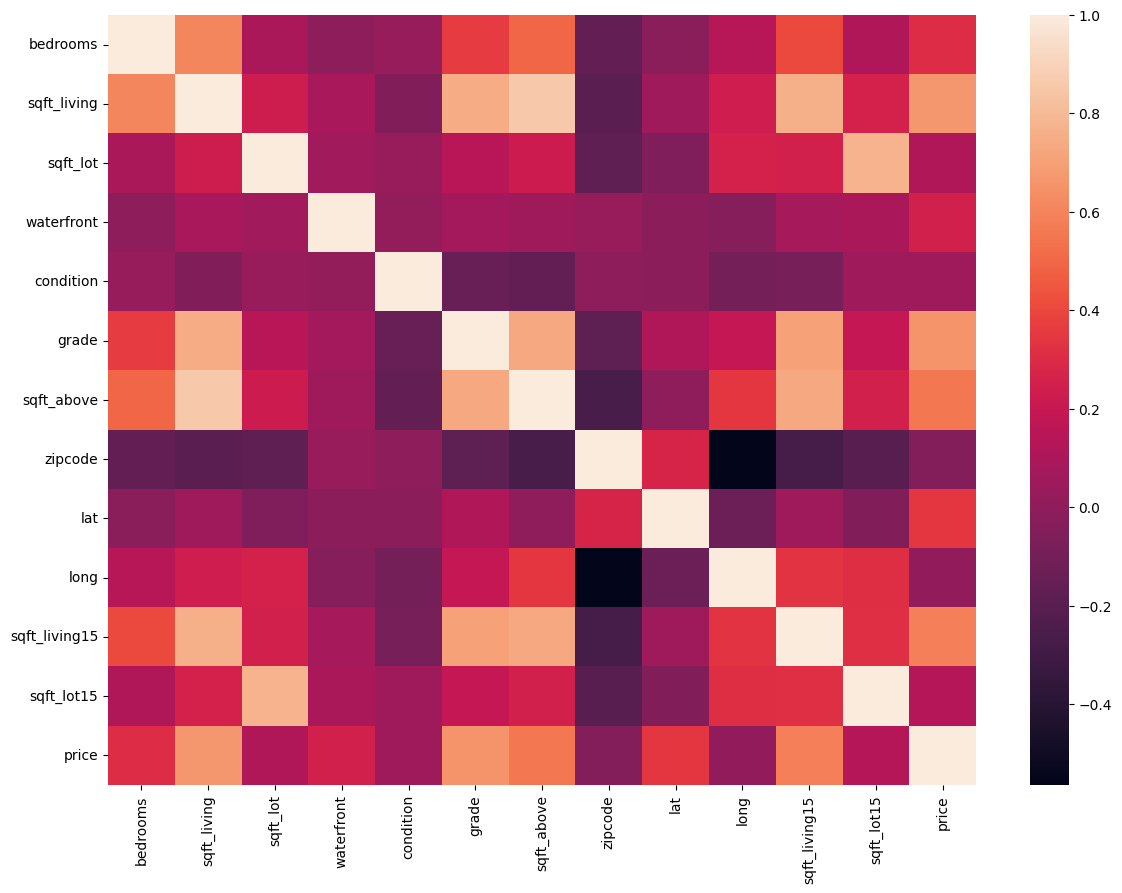

In [55]:
corr = df_houses_copy1.corr()

plt.figure(figsize = (14,10))

sns.heatmap(corr)

Here we can see the relationship between the other columns except the price column.

Here we can say that there is a positive relationship between sqrt_above and sqrt_living.
We also see a positive relationship between sqrt_living and sqrt_living 15. This means that the living spaces of the houses that are close to each other are similar to each other. Maybe the same company built these houses.

We can say that there is a relationship between grade and sqft_living. We can say that as the living area increases, the score of the house also increases.

## Graphing over Hypotheses

# Hypotheses

* The price of the house with a waterfront is higher than the other. (False)
* As the number of bedrooms increases, the price of the house increases.(False)
* As the grade points increase, the price of the house increases. (TRUE)
* As Condition points increase, the price of the house increases. (False)

# Questions
1. Do houses with a waterfront cost more than those without? (No, there is no relationship between them. Houses that do not have a waterfront can be expensive.)
2. Does the price of the house increase as the living area increases? (Yes)
3. Does the price of the house increase as the lot area increases? (No, on the contrary, it reduces it.)
4. Does the price of the houses change as the area of Living15 increases? (increasing in price)
5. Does the price of the houses increase as the Lot15 area increases? (No, like sqrt_lot, the price of the house decreases as lot15 increases.)

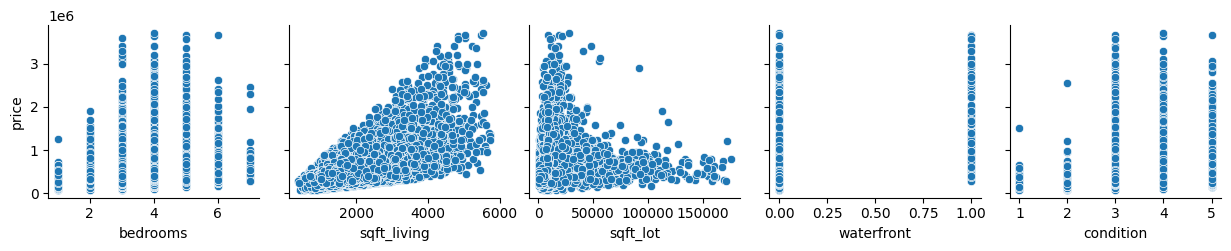

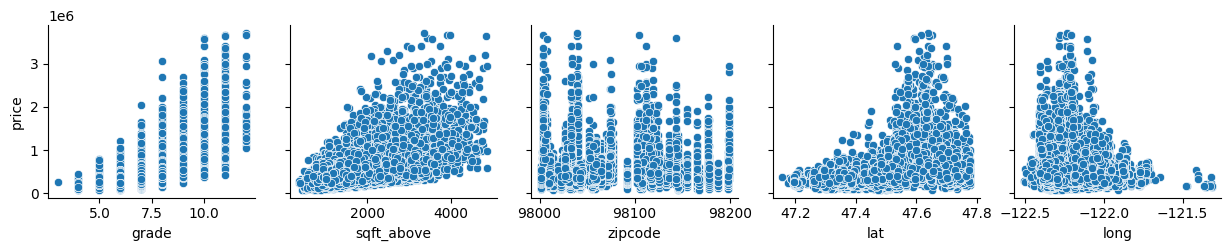

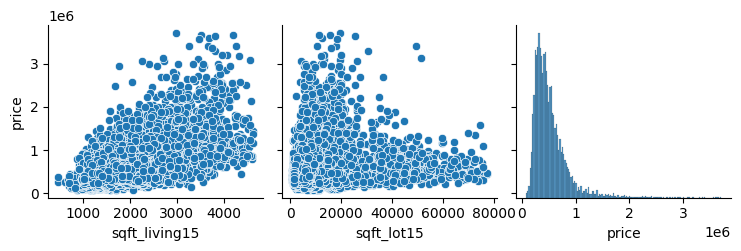

In [57]:
for i in range(0, len(df_houses_copy1.columns), 5):
    sns.pairplot(data=df_houses_copy1,
                x_vars=df_houses_copy1.columns[i:i+5],
                y_vars=['price'])

We can answer our hypotheses and questions on the pair plot we created above.

Now that we have answered the questions and analyzed the relationships between our data, we can now recommend a house or houses to our client.

## Insights and Recommendations

# Insights
- The living areas of the houses affect the price of the house. As the living area increases, the price of the house also increases.
- The grade points given to the house affect the price of the house. Whichever house is given a high grade point, that house is more expensive.
- As the area of the first floor of the house increases, the price of the house also increases.

# Recommendations
Considering the customer's characteristics;
- I can suggest a house with a waterfront.
- Besides, I can recommend houses with higher than average grade points because they want a 'good' house.
- Since my client wants to live in isolation, I can recommend houses with a larger land area but smaller living area in his own house and neighboring houses. Besides, I can recommend houses above a certain land/living area ratio.
- Since it has a limited budget, I can recommend the cheapest houses among the houses that meet the above conditions.

Let's find the house to recommend to the customer according to the Recommendations Lara. The first step is to find homes that have a waterfront.

In [58]:
df_waterfront = df_houses_copy1.query('waterfront == 1')
df_waterfront

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
45,3.000,2753,65005,1,5,9,2165,98070,47.404,-122.451,2680,72513,1350000
219,2.000,1450,15798,1,3,7,1230,98166,47.450,-122.375,2030,13193,655000
235,4.000,3650,8354,1,3,9,1830,98074,47.634,-122.072,3120,18841,2400000
253,1.000,760,10079,1,5,5,760,98070,47.468,-122.438,1230,14267,369900
289,4.000,4550,18641,1,3,10,2600,98074,47.605,-122.077,4550,19508,3080000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19493,3.000,2830,4334,1,3,10,2830,98074,47.632,-122.071,2830,38211,1900000
19828,3.000,4410,10756,1,3,11,3430,98056,47.528,-122.205,3550,5634,3000000
20262,4.000,4360,8175,1,3,10,3940,98008,47.572,-122.104,2670,8525,2300000
20684,3.000,3760,5634,1,3,11,2830,98056,47.529,-122.205,3560,5762,2230000


There were 126 houses on the waterfront in front of us. Now, in the second step, let's filter on the 'condition' and 'grade' values because the customer wants a `Nice` house. In order to meet this request of our customer, we can choose the houses above the condition and grade average scores.

In [59]:
# Let's see how many different types of conditions
df_waterfront['condition'].unique()

array([5, 3, 4, 2, 1])

In [60]:
# Let's see that how many different types of grades
df_waterfront['grade'].unique()

array([ 9,  7,  5, 10,  8,  6, 12, 11])

In [62]:
df_client = df_waterfront.query('grade > 8 & condition > 3')
df_client

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
45,3.000,2753,65005,1,5,9,2165,98070,47.404,-122.451,2680,72513,1350000
444,3.000,1970,20978,1,4,9,1770,98070,47.384,-122.438,2280,75396,705000
2128,3.000,2690,8890,1,4,10,2690,98006,47.549,-122.197,2940,8890,1650000
4205,3.000,2490,24691,1,4,9,1580,98146,47.488,-122.364,2800,24121,1160000
4537,4.000,3440,23954,1,5,10,2260,98040,47.564,-122.231,4230,18723,2490000
6352,6.000,5480,19401,1,5,11,3910,98105,47.651,-122.277,3510,15810,3650000
7141,3.000,3920,13085,1,4,11,3920,98040,47.572,-122.204,3450,13287,3100000
7697,4.000,3020,11489,1,5,10,2110,98040,47.539,-122.210,3890,11489,1900000
8570,3.000,2790,13295,1,4,10,2370,98006,47.547,-122.197,3140,11949,1800000
10802,4.000,3520,19200,1,4,9,1950,98136,47.525,-122.393,2450,7000,1660000


In the next step, since our customer wants to live in isolation, we will need to filter over `sqft_living15` and `sqft_log15` values. The larger the land of the neighbors and the smaller the living areas of the neighbors, the house of our customer will be far from the neighbor houses and live in isolation. (Of course, the customer's house must be of the same criteria so that the distance between the two houses is far.)

In [69]:
df_client = df_client.query('sqft_living15 < 3300 & sqft_lot15 > 25000')
df_client

,bedrooms,sqft_living,sqft_lot,waterfront,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,price
45,3.000,2753,65005,1,5,9,2165,98070,47.404,-122.451,2680,72513,1350000
444,3.000,1970,20978,1,4,9,1770,98070,47.384,-122.438,2280,75396,705000
14261,3.000,3620,28064,1,5,10,2370,98136,47.552,-122.398,2550,34713,2230000
16724,3.000,2960,69351,1,4,9,2960,98070,47.400,-122.420,2350,41433,750000
18265,4.000,3120,49456,1,4,9,2590,98198,47.353,-122.323,2030,32181,1230000


When we listed our data according to the customer's requests, we were left with 5 houses. The most likely houses that our customer can choose according to their budget are those with 705k dollars and 750k dollars. At the end of the day, I can easily recommend these two houses to my customer and the probability of buying the house is very high.

In [70]:
df_client.iloc[1][:]

bedrooms             3.000
sqft_living       1970.000
sqft_lot         20978.000
waterfront           1.000
condition            4.000
grade                9.000
sqft_above        1770.000
zipcode          98070.000
lat                 47.384
long              -122.438
sqft_living15     2280.000
sqft_lot15       75396.000
price           705000.000
Name: 444, dtype: float64

In [71]:
df_client.iloc[3][:]

bedrooms             3.000
sqft_living       2960.000
sqft_lot         69351.000
waterfront           1.000
condition            4.000
grade                9.000
sqft_above        2960.000
zipcode          98070.000
lat                 47.400
long              -122.420
sqft_living15     2350.000
sqft_lot15       41433.000
price           750000.000
Name: 16724, dtype: float64

In [94]:
import folium
from  folium.plugins import HeatMap

# create a base map
basemap = folium.Map(location=[df_houses_copy['lat'].mean(),df_houses_copy['long'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = df_client[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

In [93]:
# create a base map
basemap = folium.Map(location=[df_houses_copy['lat'].mean(),df_houses_copy['long'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = df_houses_copy1[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map

In [95]:
# create a base map
basemap = folium.Map(location=[df_client['lat'].mean(),df_houses_copy['long'].mean()], zoom_start = 9)

# add heatmap
coordinate_copy = df_client[['lat','long']].copy()
coordinate_copy['count'] = 1
HeatMap(data = coordinate_copy.groupby(['lat','long']).sum().reset_index().values.tolist()
                       , radius=8, max_zoom=13, name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed = False).add_to(basemap) # turn off the heatmap toggle
basemap # render the map